In [1]:
import math
import cv2
import matplotlib.pyplot as plt
import numpy as np

(710, 740, 3)


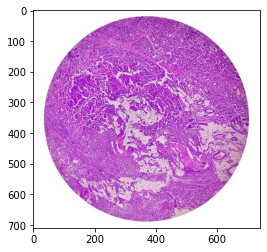

In [2]:
# cargar imagen 

frame = cv2.imread(r"images\histologia.jpg")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print(frame.shape)
plt.imshow(frame)

(145, 157, 3)
(145, 157)


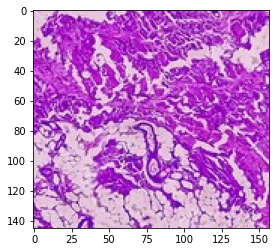

In [3]:
# lectura archivo de coordenadas
with open("img_tools\position.dat", 'r') as archivo:
    coordenadas  = archivo.read()
# Procesar o imprimir el contenido según sea necesario

coordenadas = eval(coordenadas)

coordenada1, coordenada2 = coordenadas
x1, y1 = coordenada1
x2, y2 = coordenada2

#Seleccion de region de interes
imgROI = frame[y1:y2, x1:x2]

plt.imshow(imgROI)

print(imgROI.shape)

tamX, tamY, _ = imgROI.shape

# Contenedor donde se almacena el cambio de espacio
H = np.zeros([tamX,tamY], dtype = int)
Hcomp = np.zeros([tamX,tamY], dtype=int)

sumaAng = np.ones([tamX,tamY], dtype=int)*180

print(H.shape)


#Transformacion al espacio HSV

for i in range(0,tamX):
    for j in range(0,tamY):
        R = imgROI[i,j,0]/255
        G = imgROI[i,j,1]/255
        B = imgROI[i,j,2]/255

        num = 0.5*((R-G) + (R-B))
        den = math.sqrt((R-G)**2 + (R-B)*(G-B))
        
        if num == 0 and den == 0:
            dato = 0

        else:
            dato = math.degrees(math.acos(num/den))

        if dato > 180:
            dato = dato-360     
            
        H[i,j] = dato
        

In [4]:
from math import radians, degrees

R = (imgROI[:,:,0]).mean()
G = (imgROI[:,:,1]).mean()
B = (imgROI[:,:,2]).mean()

print("R:", R, "G:", G, "B:", B)

#normalizado 0-1
R = (imgROI[:,:,0]/255).mean()
G = (imgROI[:,:,1]/255).mean()
B = (imgROI[:,:,2]/255).mean()

print("R:", R, "G:", G, "B:", B)

num = 0.5*((R-G) + (R-B))
den = math.sqrt((R-G)**2 + (R-B)*(G-B))
H = degrees(np.arccos(num/den))


H = 360-H

print("H", H)

if H>180:
    H = H-360

print("H", H)

Hcomp = H + 180
print("Hcomp", Hcomp)

I = 1
S = 1

dato = Hcomp

if  dato < 120: 
    R_ = I*( 1+ ( (S*np.cos(  radians(dato)  ) ) / np.cos( radians(60-dato)  )))
    G_ = 3*I - (R+B)
    B_ = I*(1-S)

elif dato >= 120 and dato <240:
    R_ = I*(1-S)
    G_ = I * ( 1 + (S* np.cos(radians(dato-120)  )) / ( np.cos(radians(180-dato))  ))
    B_ = 3*I - (R+G)

elif dato >= 240 and dato <360:
    R_ = 3*I - (B+G)
    G_ = I*(1-S)
    B_ = I*(1 + (  (S * np.cos(radians(dato-240)  ) ) / ( np.cos(radians(300-dato))) ))


R_ = R_*255
G_ = G_*255
B_ = B_*255


R_ = min(255, max(0, R_))
G_ = min(255, max(0, G_))
B_ = min(255, max(0, B_))



print("RGB complementario", "R:", R_,"G:", G_, "B:", B_)


R: 189.05433779925323 G: 104.55721502306172 B: 201.44256534153305
R: 0.7413895599970716 G: 0.4100282942080852 B: 0.7899708444766003
H 293.2534239043065
H -66.74657609569351
Hcomp 113.25342390430649
RGB complementario R: 86.72722404972157 G: 255 B: 0


92 0


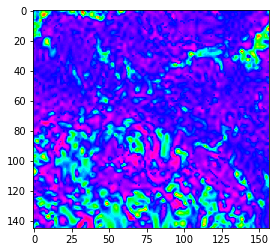

In [63]:
plt.imshow(H, cmap="hsv")
print(np.amax(H), np.amin(H))

272 180


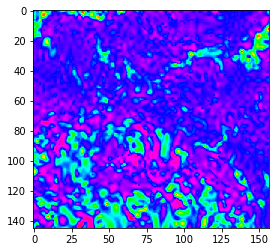

In [64]:
Hcomp = H + sumaAng
plt.imshow(Hcomp, cmap="hsv")
print(np.amax(Hcomp), np.amin(Hcomp))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4.999999999999999
0.0


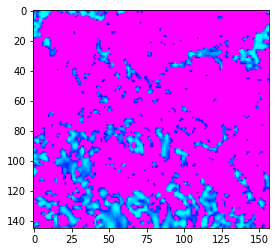

In [65]:
# transofrmacion del espacio hsv a rgb
from math import degrees, radians

imgRGB = np.zeros([tamX,tamY,3])

R_ = np.zeros([tamX,tamY])
G_ = np.zeros([tamX,tamY])
B_ = np.zeros([tamX,tamY])

I = 1
S = 1

for i in range(0,tamX):
    for j in range(0,tamY):

        dato = Hcomp[i,j]
        R = imgROI[i,j,0]/255
        G = imgROI[i,j,1]/255
        B = imgROI[i,j,2]/255

        if  dato < 120: 
            R_ = I*( 1+ ( (S*np.cos(  radians(dato)  ) ) / np.cos( radians(60-dato)  )))
            G_ = 3*I - (R+B)
            B_ = I*(1-S)

        elif dato >= 120 and dato <240:
            R_ = I*(1-S)
            G_ = I * ( 1 + (S* np.cos(radians(dato-120)  )) / ( np.cos(radians(180-dato))  ))
            B_ = 3*I - (R+G)

        elif dato >= 240 and dato <360:
            R_ = 3*I - (B+G)
            G_ = I*(1-S)
            B_ = I*(1 + (  (S + np.cos(radians(dato-240)  ) ) / ( np.cos(radians(300-dato))) ))

        imgRGB[i,j,0] = R_
        imgRGB[i,j,1] = G_
        imgRGB[i,j,2] = B_

print(np.amax(imgRGB))
print(np.amin(imgRGB))

plt.imshow(imgRGB)

In [67]:
print(Hcomp.mean())

242.82745442565343


In [66]:
print("ROJO: ", imgRGB[i,j,0].mean())
print("VERDE: ", imgRGB[i,j,1].mean())
print("AZUL: ", imgRGB[i,j,2].mean())

ROJO:  1.8549019607843138
VERDE:  0.0
AZUL:  4.3108946686063465


In [ ]:
dato 

In [1]:
info = {1: "h", 2: "o", 3: "l", 4:"a"}

In [2]:
info[1]

'h'